#Convex Optimization and Quadratic Smoothing Example
***

In [56]:
%matplotlib inline
import sys
from math import pi
from cvxopt import blas, lapack, matrix, sin, mul, normal    
from matplotlib import rcParams
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import cvxopt as cvxopt
rcParams['figure.figsize'] = (14, 6)
rcParams['figure.dpi'] = 150
plt.style.use('ggplot')

print ' Reproducibility conditions for the Convex Optimization '.center(80, '-')
print ' '
print ' Python Version: ' + sys.version
print ' Numpy Version: ' + np.__version__
print ' Matplotlib Version:' + matplotlib.__version__
print ' ' 
print '-'*80

------------ Reproducibility conditions for the Convex Optimization ------------
 
 Python Version: 2.7.10 |Anaconda 2.3.0 (x86_64)| (default, May 28 2015, 17:04:42) 
[GCC 4.2.1 (Apple Inc. build 5577)]
 Numpy Version: 1.9.2
 Matplotlib Version:1.4.3
 
--------------------------------------------------------------------------------


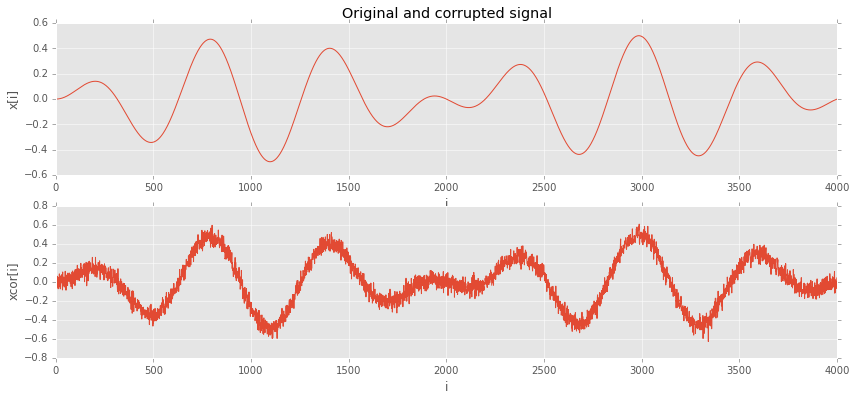

In [59]:
points = 4000
t = matrix(list(range(points)), tc='d')
ex = 0.5 * mul( sin(2*pi/points * t), sin(0.01 * t))
corr = ex + 0.05 * normal(points,1)

# Plotting original and corrupted signal 
plt.figure(1, facecolor='w')
plt.subplot(211)
plt.plot(t, ex)
plt.ylabel('x[i]')
plt.xlabel('i')
plt.title('Original and corrupted signal')
plt.subplot(212)
plt.plot(t, corr);
plt.ylabel('xcor[i]')
plt.xlabel('i');

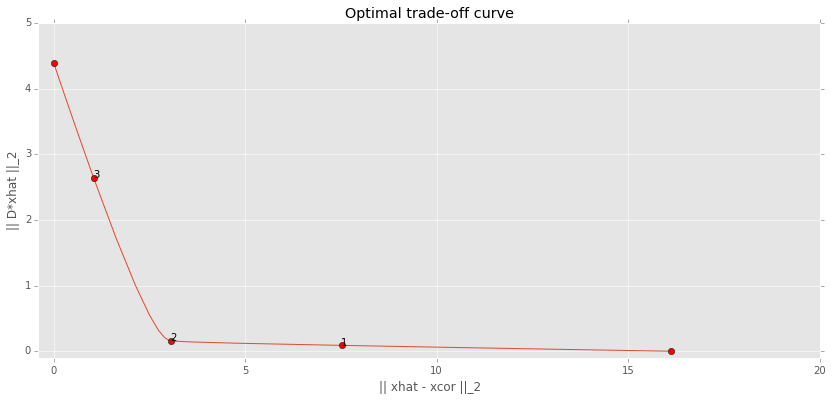

In [63]:
# A = D'*D is an n by n tridiagonal matrix with -1.0 on the
# upper/lower diagonal and 1, 2, 2, ..., 2, 2, 1 on the diagonal.
Ad = matrix([1.0] + (points-2)*[2.0] + [1.0])
As = matrix(-1.0, (points-1,1))

nopts = 50
deltas = -10.0 + 20.0/(nopts-1) * matrix(list(range(nopts)))
cost1, cost2 = [], []
for delta in deltas:
    xr = +corr
    lapack.ptsv(1.0 + 10**delta * Ad, 10**delta *As, xr)
    cost1 += [blas.nrm2(xr - corr)]
    cost2 += [blas.nrm2(xr[1:] - xr[:-1])]

# Find solutions with ||xhat - xcorr || roughly equal to 8.0, 3.1, 1.0.
mv1, k1 = min(zip([abs(c - 8.0) for c in cost1], range(nopts)))
xr1 = +corr
lapack.ptsv(1.0 + 10**deltas[k1] * Ad, 10**deltas[k1] *As, xr1)
mv2, k2 = min(zip([abs(c - 3.1) for c in cost1], range(nopts)))
xr2 = +corr
lapack.ptsv(1.0 + 10**deltas[k2] * Ad, 10**deltas[k2] *As, xr2)
mv3, k3 = min(zip([abs(c - 1.0) for c in cost1], range(nopts)))
xr3 = +corr
lapack.ptsv(1.0 + 10**deltas[k3] * Ad, 10**deltas[k3] *As, xr3)


plt.figure(2, facecolor='w')
plt.plot(cost1, cost2, [blas.nrm2(corr)], [0], 'ro',
        [0], [blas.nrm2(corr[1:] - corr[:-1])], 'ro')
plt.plot([cost1[k1]], [cost2[k1]], 'ro', [cost1[k2]], [cost2[k2]], 'ro',
        [cost1[k3]], [cost2[k3]], 'ro')
plt.text(cost1[k1], cost2[k1],'1')
plt.text(cost1[k2], cost2[k2],'2')
plt.text(cost1[k3], cost2[k3],'3')
plt.title('Optimal trade-off curve')
plt.xlabel('|| xhat - xcor ||_2')
plt.ylabel('|| D*xhat ||_2')
plt.axis([-0.4, 20, -0.1, 5]);


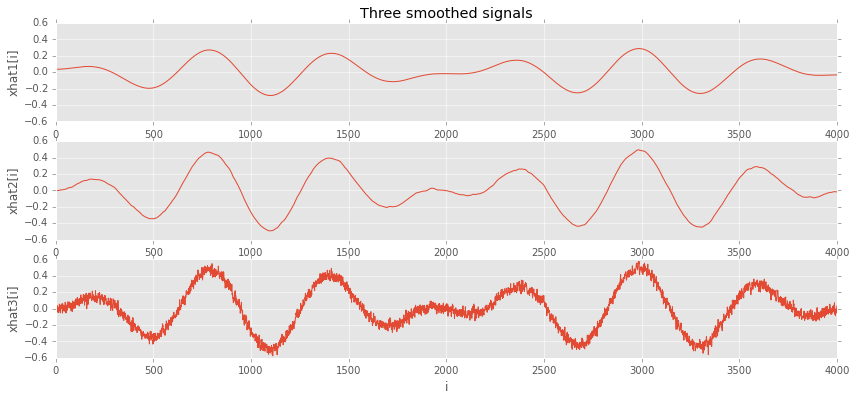

In [64]:
plt.figure(3, facecolor='w')
plt.subplot(311)
plt.plot(t, xr1)
plt.axis([0, 4000, -0.6, 0.6])
plt.ylabel('xhat1[i]')
plt.title('Three smoothed signals')

plt.subplot(312)
plt.plot(t, xr2)
plt.ylabel('xhat2[i]')
plt.axis([0, 4000, -0.6, 0.6])

plt.subplot(313)
plt.plot(t, xr3)
plt.axis([0, 4000, -0.6, 0.6])
plt.ylabel('xhat3[i]')
plt.xlabel('i')
plt.show()